In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
num_words = 10000
max_review_len = 100

In [4]:
###Read data from file
train = pd.read_csv('yelp_review_polarity_csv/train.csv', 
                    header=None, 
                    names=['Class', 'Review'])

In [5]:
train

,Class,Review
0,1,"Unfortunately, the frustration of being Dr. Go..."
1,2,Been going to Dr. Goldberg for over 10 years. ...
2,1,I don't know what Dr. Goldberg was like before...
3,1,I'm writing this review to give you a heads up...
4,2,All the food is great here. But the best thing...
...,...,...
559995,2,Ryan was as good as everyone on yelp has claim...
559996,2,Professional \nFriendly\nOn time AND affordabl...
559997,1,Phone calls always go to voicemail and message...
559998,1,Looks like all of the good reviews have gone t...


In [6]:
reviews = train['Review']

In [7]:
reviews[:5]

0    Unfortunately, the frustration of being Dr. Go...
1    Been going to Dr. Goldberg for over 10 years. ...
2    I don't know what Dr. Goldberg was like before...
3    I'm writing this review to give you a heads up...
4    All the food is great here. But the best thing...
Name: Review, dtype: object

In [8]:
###Select the correct answers
y_train = train['Class'] - 1

In [9]:
y_train

0         0
1         1
2         0
3         0
4         1
         ..
559995    1
559996    1
559997    0
559998    0
559999    1
Name: Class, Length: 560000, dtype: int64

In [15]:
reviews[:5]

0    Unfortunately, the frustration of being Dr. Go...
1    Been going to Dr. Goldberg for over 10 years. ...
2    I don't know what Dr. Goldberg was like before...
3    I'm writing this review to give you a heads up...
4    All the food is great here. But the best thing...
Name: Review, dtype: object

In [13]:
###Create tokenizer Keras
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=num_words)

In [14]:
###Train the tokenizer on Yelp reviews
tokenizer.fit_on_texts(reviews)

In [16]:
###Look through the dictionary of the tokenizer
tokenizer.word_index

{'the': 1,
 'and': 2,
 'i': 3,
 'to': 4,
 'a': 5,
 'was': 6,
 'of': 7,
 'it': 8,
 'for': 9,
 'in': 10,
 'is': 11,
 'n': 12,
 'that': 13,
 'my': 14,
 'we': 15,
 'this': 16,
 'but': 17,
 'with': 18,
 'they': 19,
 'you': 20,
 'on': 21,
 'not': 22,
 'have': 23,
 'had': 24,
 'at': 25,
 'were': 26,
 'so': 27,
 'are': 28,
 'food': 29,
 'be': 30,
 'place': 31,
 'me': 32,
 'there': 33,
 'good': 34,
 'as': 35,
 'out': 36,
 'all': 37,
 'like': 38,
 'if': 39,
 'just': 40,
 'our': 41,
 'very': 42,
 'get': 43,
 'one': 44,
 'here': 45,
 'time': 46,
 'when': 47,
 'up': 48,
 'or': 49,
 'from': 50,
 'great': 51,
 'service': 52,
 'would': 53,
 'back': 54,
 'their': 55,
 'about': 56,
 'no': 57,
 'go': 58,
 'an': 59,
 'what': 60,
 'really': 61,
 'he': 62,
 "it's": 63,
 'she': 64,
 'which': 65,
 'will': 66,
 'some': 67,
 'only': 68,
 'been': 69,
 'us': 70,
 'your': 71,
 'because': 72,
 'more': 73,
 'even': 74,
 'can': 75,
 'them': 76,
 'by': 77,
 "don't": 78,
 'got': 79,
 'other': 80,
 'after': 81,
 'do': 8

In [17]:
###Convert Yelp reviews to numeric representation
sequences = tokenizer.texts_to_sequences(reviews)

In [18]:
###View reviews in numerical representation
index = 0
print(reviews[index])
print(sequences[index])

Unfortunately, the frustration of being Dr. Goldberg's patient is a repeat of the experience I've had with so many other doctors in NYC -- good doctor, terrible staff.  It seems that his staff simply never answers the phone.  It usually takes 2 hours of repeated calling to get an answer.  Who has time for that or wants to deal with it?  I have run into this problem with many other doctors and I just don't get it.  You have office workers, you have patients with medical needs, why isn't anyone answering the phone?  It's incomprehensible and not work the aggravation.  It's with regret that I feel that I have to give Dr. Goldberg 2 stars.
[707, 1, 4339, 7, 173, 939, 1665, 11, 5, 2161, 7, 1, 137, 112, 24, 18, 27, 189, 80, 3128, 10, 2636, 34, 1416, 462, 129, 8, 519, 13, 177, 129, 803, 88, 3812, 1, 446, 8, 392, 841, 115, 360, 7, 4136, 1438, 4, 43, 59, 1266, 118, 95, 46, 9, 13, 49, 1687, 4, 418, 18, 8, 3, 23, 563, 178, 16, 460, 18, 189, 80, 3128, 2, 3, 40, 78, 43, 8, 20, 23, 644, 1343, 20, 23

In [20]:
tokenizer.word_index['unfortunately']

707

In [21]:
###Limit the length of reviews
X_train = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_review_len)

In [22]:
X_train[:5]

array([[   7,    1,  137,  112,   24,   18,   27,  189,   80, 3128,   10,
        2636,   34, 1416,  462,  129,    8,  519,   13,  177,  129,  803,
          88, 3812,    1,  446,    8,  392,  841,  115,  360,    7, 4136,
        1438,    4,   43,   59, 1266,  118,   95,   46,    9,   13,   49,
        1687,    4,  418,   18,    8,    3,   23,  563,  178,   16,  460,
          18,  189,   80, 3128,    2,    3,   40,   78,   43,    8,   20,
          23,  644, 1343,   20,   23, 3252,   18, 2921,  637,  227,  430,
         476, 4312,    1,  446,   63,    2,   22,  215,    1,   63,   18,
        2269,   13,    3,  249,   13,    3,   23,    4,  163,  939,  115,
         237],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,   69,  116,
           4,  939,    9,   94,  201,  274,    3,  142,    3,    6,   44,
           7,  177, 2084, 3252,   47,   62,  422,   25, 1334,   69,   51,
          94,    1,  274,    2,   11,   61,   37,   56,    1,  219, 1403,
           8,   11,   7

In [23]:
###Create NN
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(num_words, 64, input_length=max_review_len))
model.add(tf.keras.layers.LSTM(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [24]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [26]:
###Train NN
###Create a callback to preserve the neural network at each epoch, 
###if the accuracy of work on the test data set has improved. The network is saved to the file best_model.h5
model_save_path = 'best_model.h5'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(model_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [28]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=5,
                    batch_size=128,
                    validation_split=0.1,
                    callbacks=[checkpoint_callback])

Epoch 1/5
3938/3938 [==============================] - ETA: 0s - loss: 0.2049 - accuracy: 0.9182
Epoch 00001: val_accuracy improved from -inf to 0.95145, saving model to best_model.h5
3938/3938 [==============================] - 509s 129ms/step - loss: 0.2049 - accuracy: 0.9182 - val_loss: 0.1280 - val_accuracy: 0.9514
Epoch 2/5
3938/3938 [==============================] - ETA: 0s - loss: 0.1426 - accuracy: 0.9450
Epoch 00002: val_accuracy improved from 0.95145 to 0.95739, saving model to best_model.h5
3938/3938 [==============================] - 502s 128ms/step - loss: 0.1426 - accuracy: 0.9450 - val_loss: 0.1122 - val_accuracy: 0.9574
Epoch 3/5
3938/3938 [==============================] - ETA: 0s - loss: 0.1202 - accuracy: 0.9540
Epoch 00003: val_accuracy improved from 0.95739 to 0.95807, saving model to best_model.h5
3938/3938 [==============================] - 512s 130ms/step - loss: 0.1202 - accuracy: 0.9540 - val_loss: 0.1094 - val_accuracy: 0.9581
Epoch 4/5
3938/3938 [==========

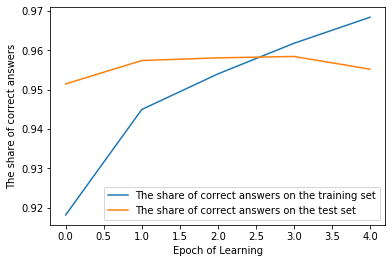

In [54]:
plt.plot(history.history['accuracy'], 
         label='The share of correct answers on the training set')
plt.plot(history.history['val_accuracy'], 
         label='The share of correct answers on the test set')
plt.xlabel('Epoch of Learning')
plt.ylabel('The share of correct answers')
plt.legend()
plt.show()

In [56]:
###Load the model with the best share of correct answers on the test data set
model.load_weights(model_save_path)

In [57]:
test = pd.read_csv('yelp_review_polarity_csv/test.csv', 
                    header=None, 
                    names=['Class', 'Review'])

In [58]:
test

,Class,Review
0,2,"Contrary to other reviews, I have zero complai..."
1,1,Last summer I had an appointment to get new ti...
2,2,"Friendly staff, same starbucks fair you get an..."
3,1,The food is good. Unfortunately the service is...
4,2,Even when we didn't have a car Filene's Baseme...
...,...,...
37995,1,If I could give 0...I would. Don't do it.
37996,2,Items Selected:\nChocolate Cinnamon Horn\nSmal...
37997,1,Expensive lunch meals. Fried pickles were goo...
37998,1,Highly overpriced and food was cold. Our waitr...


In [59]:
###Convert reviews to numeric representation
test_sequences = tokenizer.texts_to_sequences(test['Review'])

In [60]:
###Limit the length of reviews
X_test = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_review_len)

In [61]:
X_test[:5]

array([[   7,    1,  137,  112,   24,   18,   27,  189,   80, 3128,   10,
        2636,   34, 1416,  462,  129,    8,  519,   13,  177,  129,  803,
          88, 3812,    1,  446,    8,  392,  841,  115,  360,    7, 4136,
        1438,    4,   43,   59, 1266,  118,   95,   46,    9,   13,   49,
        1687,    4,  418,   18,    8,    3,   23,  563,  178,   16,  460,
          18,  189,   80, 3128,    2,    3,   40,   78,   43,    8,   20,
          23,  644, 1343,   20,   23, 3252,   18, 2921,  637,  227,  430,
         476, 4312,    1,  446,   63,    2,   22,  215,    1,   63,   18,
        2269,   13,    3,  249,   13,    3,   23,    4,  163,  939,  115,
         237],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,   69,  116,
           4,  939,    9,   94,  201,  274,    3,  142,    3,    6,   44,
           7,  177, 2084, 3252,   47,   62,  422,   25, 1334,   69,   51,
          94,    1,  274,    2,   11,   61,   37,   56,    1,  219, 1403,
           8,   11,   7

In [62]:
###Corresct answer
y_test = test['Class'] - 1

In [63]:
y_test

0        1
1        0
2        1
3        0
4        1
        ..
37995    0
37996    1
37997    0
37998    0
37999    0
Name: Class, Length: 38000, dtype: int64

In [79]:
###Evaluate tonality on own review
text = '''Hello everyone! Today we have visited the Three Wings restaurant for the first time. 
Well, I can poorly call it a restaurant, the best name for it is an eatery. 
My husband and I had a twenty-year anniversary, so we booked a table based on reviews. 
The administrator girl talked to me politely during the call, it was one of the pros. 
But when we arrived, there was no free table with a city view, besides I asked to book one. 
They didn’t even apologize to us! 
Well, we thought that at least the food would make this situation better. 
We ordered a rack of lamb with a Belgian salad, fresh orange juice and a cheesecake for dessert. 
We waited for lamb for at least 50 minutes! 
I don’t know what they hade done with a lamb in the kitchen, but it was stiff and cooled. 
The juice was clearly not fresh, but poured from a bottle. 
There are no complaints about the salad, except that the portion was tiny. 
The worst thing is that the waitress poured coffee on me, and when I asked to call the administrator, she insulted me! 
The wasn't a complaint book there, or maybe she had lied about it. 
Moreover, there was someone else's meal in our bill.
Pros: quite a clean place with a good location
Cons: all these facts
To summarize I want to warn you: DON'T VISIT THIS RESTAURANT. They have totally ruined this evening '''

In [80]:
sequence = tokenizer.texts_to_sequences([text])

In [81]:
sequence

[[1981,
  354,
  491,
  15,
  23,
  1048,
  1,
  378,
  616,
  104,
  9,
  1,
  105,
  46,
  91,
  3,
  75,
  1860,
  290,
  8,
  5,
  104,
  1,
  111,
  443,
  9,
  8,
  11,
  59,
  4217,
  14,
  369,
  2,
  3,
  24,
  5,
  2876,
  420,
  2447,
  27,
  15,
  1169,
  5,
  156,
  781,
  21,
  336,
  1,
  560,
  1489,
  4,
  32,
  3014,
  400,
  1,
  290,
  8,
  6,
  44,
  7,
  1,
  3692,
  17,
  47,
  15,
  429,
  33,
  6,
  57,
  251,
  156,
  18,
  5,
  770,
  653,
  1807,
  3,
  149,
  4,
  964,
  44,
  19,
  74,
  2199,
  4,
  70,
  91,
  15,
  252,
  13,
  25,
  298,
  1,
  29,
  53,
  123,
  16,
  1143,
  114,
  15,
  89,
  5,
  2749,
  7,
  1146,
  18,
  5,
  6472,
  196,
  207,
  1141,
  1231,
  2,
  5,
  1765,
  9,
  456,
  15,
  396,
  9,
  1146,
  9,
  25,
  298,
  512,
  130,
  3,
  113,
  60,
  19,
  282,
  18,
  5,
  1146,
  10,
  1,
  537,
  17,
  8,
  6,
  5347,
  2,
  8018,
  1,
  1231,
  6,
  935,
  22,
  207,
  17,
  2829,
  50,
  5,
  775,
  33,
  28,
  57,
  1547,
 

In [82]:
data = tf.keras.preprocessing.sequence.pad_sequences(sequence, maxlen=250)

In [83]:
data

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0, 1981,  354,  491,   15,   23, 1048,    1,  378,  616,  104,
           9,    1,  105,   46,   91,    3,   75, 1860,  290,    8,    5,
         104,    1,  111,  443,    9,    8,   11,   59, 4217,   14,  369,
           2,    3,   24,    5, 2876,  420, 2447,   27,   15, 1169,    5,
         156,  781,   21,  336,    1,  560, 1489,    4,   32, 3014,  400,
           1,  290,    8,    6,   44,    7,    1, 3692,   17,   47,   15,
         429,   33,    6,   57,  251,  156,   18,    5,  770,  653, 1807,
           3,  149,    4,  964,   44,   19,   74, 2199,    4,   70,   91,
          15,  252,   13,   25,  298,    1,   29,   53,  123,   16, 1143,
         114,   15,   89,    5, 2749,    7, 1146,   18,    5, 6472,  196,
         207, 1141, 1231,    2,    5, 1765,    9,  456,   15,  396,    9,
        1146,    9,   25,  298,  512,  130,    3,  113,   60,   19,  282,
          18,    5, 1146,   10,    1, 

In [84]:
result = model.predict(data)

In [85]:
result

array([[0.00155987]], dtype=float32)

In [86]:
if result[[0]] < 0.5:
    print('Review negative')
else:
    print('Review positive')

Review negative
